# P8 - Neural Network Classification, Model Selection, Model Evaluation

## Neural Network Classification using the Iris Dataset

In [22]:
# %pip install numpy pandas matplotlib scikit-learn

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# We will use an example dataset that comes with scikit learn
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [24]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [28]:
X = iris.data
y = iris.target

In [29]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Let's check how many unique values we have in the target column (i.e., how many classes we have)

In [31]:
y.unique()

array([0, 1, 2])

Let's split the data into train and test set first!
We choose the test set to be 20% of the data.

In [32]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

# Model Selection
## The Holdout Method

Split off a validation set. Again, we slice out 20% of the remaining training data for validation.

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1337)

In [34]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter=500,
                   hidden_layer_sizes=(50,), 
                   solver='adam',
                   random_state=1337, verbose=False)

nn.fit(X_train, y_train)
print(f'Final Train Loss: {nn.loss_}')

Final Train Loss: 0.11346384322111384


/home/wedenigt/Uni/PhD/ml_venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
y_pred_val = nn.predict(X_val)
print(y_pred_val)

[0 0 1 2 1 2 1 2 1 1 0 1 1 2 0 0 2 0 0 0 2 2 0 1]


In [36]:
from sklearn.metrics import classification_report

# show classification report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.95      0.96      0.95        24
weighted avg       0.96      0.96      0.96        24



In [37]:
nn = MLPClassifier(max_iter=500,
                   hidden_layer_sizes=(200,100), 
                   solver='adam',
                   random_state=1337, verbose=False)

nn.fit(X_train, y_train)
print(f'Final Train Loss: {nn.loss_}')

Final Train Loss: 0.060962136009466074


In [38]:
y_pred_val = nn.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



## Grid Search with Cross Validation

The validation set we have used is pretty small. We can use cross validation to get a better estimate of the model's performance.
Also, we can try out a few different hyperparameters using Grid Search.

In [39]:
from sklearn.model_selection import GridSearchCV

params = {
            'hidden_layer_sizes' : [(200,), (400,)],
            'batch_size' : [64, 32, 16]
         }

nn = MLPClassifier(max_iter=500, random_state=1337)
gs = GridSearchCV(nn, params, cv=5, verbose=4)
gs.fit(X_train_full, y_train_full) # Note: We use the full training set here (without splitting off a validation set)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END batch_size=64, hidden_layer_sizes=(200,);, score=0.958 total time=   0.4s
[CV 2/5] END batch_size=64, hidden_layer_sizes=(200,);, score=0.958 total time=   0.3s
[CV 3/5] END batch_size=64, hidden_layer_sizes=(200,);, score=0.958 total time=   0.3s
[CV 4/5] END batch_size=64, hidden_layer_sizes=(200,);, score=0.958 total time=   0.3s
[CV 5/5] END batch_size=64, hidden_layer_sizes=(200,);, score=0.958 total time=   0.4s
[CV 1/5] END batch_size=64, hidden_layer_sizes=(400,);, score=0.958 total time=   0.5s
[CV 2/5] END batch_size=64, hidden_layer_sizes=(400,);, score=1.000 total time=   0.3s
[CV 3/5] END batch_size=64, hidden_layer_sizes=(400,);, score=0.958 total time=   0.3s
[CV 4/5] END batch_size=64, hidden_layer_sizes=(400,);, score=1.000 total time=   0.4s
[CV 5/5] END batch_size=64, hidden_layer_sizes=(400,);, score=0.958 total time=   0.4s
[CV 1/5] END batch_size=32, hidden_layer_sizes=(200,);, score=0.958 to

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=1337),
             param_grid={'batch_size': [64, 32, 16],
                         'hidden_layer_sizes': [(200,), (400,)]},
             verbose=4)

In [40]:
print(gs.best_params_)
print(gs.best_score_) # best mean cross-validated score (accuracy)

{'batch_size': 64, 'hidden_layer_sizes': (400,)}
0.975


In [41]:
nn = gs.best_estimator_

Let's show the confusion matrix on the test set

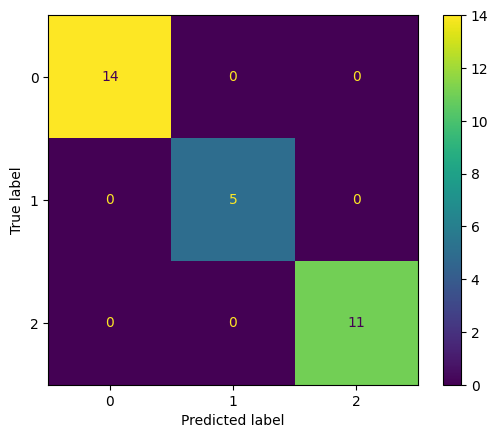

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = nn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn.classes_)
disp.plot()
plt.show()